# Classifier based on neural network

Product for studings <br>
Author: https://orcid.org/0000-0001-9996-6638

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 

from pandas import DataFrame
from matplotlib import pyplot as plt

from sklearn import linear_model, model_selection, metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import losses

from IPython import display
from mlibrary import *

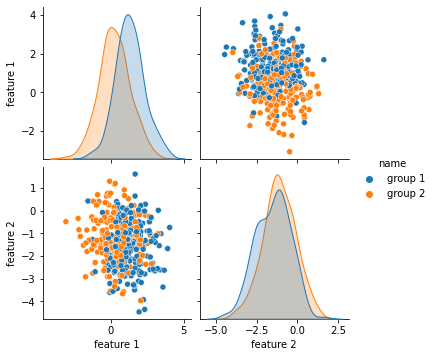

In [2]:
df = gen_dataset(N_points = 200, N_groups = 2, N_features=2)
sns.pairplot(data = df[df.columns.difference(['tag'])], hue = 'name')

In [3]:
train, test = train_test_split(df[df.columns.difference(['name'])])
print('train/test: %f'%(len(train)*1./len(test)))

X_train = train[train.keys()[:-1]]
y_train = train['tag'].to_numpy(dtype=np.int64)
X_test  = test[test.keys()[:-1]]
y_test  = test['tag'].to_numpy(dtype=np.int64)

n_features = len(X_test.keys())

train/test: 3.000000


In [4]:
poly = PolynomialFeatures(2, interaction_only=False, include_bias=False)
X_train_upscaled = poly.fit_transform(X_train)
X_test_upscaled = poly.fit_transform(X_test)

In [10]:
model = Sequential()

model.add(Dense(2, input_dim=len(X_train_upscaled[0]), activation='selu', kernel_initializer='he_normal'))
model.add(Dense(3, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid') )
model.compile(loss='binary_crossentropy', optimizer='adam')

# loss_history = DataFrame(columns=['Epoch', 'Loss'])
# accuracy_history = DataFrame(columns=['Epoch', 'Type', 'Accuracy', 'Error'])
# i = 0
losses, test_accs, train_accs, measured_points = [[] for _ in range(4)]

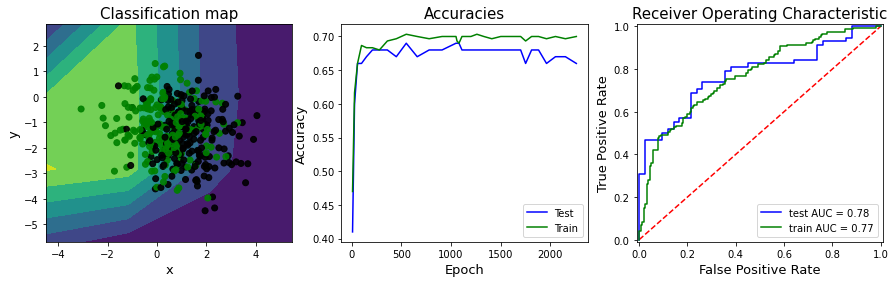

KeyboardInterrupt: 

In [13]:
y_score = lambda XX: model.predict(poly.fit_transform(XX)).ravel()

for i in range(1,40):
    history = model.fit(X_train_upscaled, y_train, epochs=i*10, verbose=0)
    
    losses += history.history['loss']
    test_accs.append(accuracy_score(y_test, np.round(y_score(X_test))))
    train_accs.append(accuracy_score(y_train, np.round(y_score(X_train))))
    if len(measured_points) == 0:
        measured_points.append(len(history.epoch))
    else:
        measured_points.append(measured_points[-1]+len(history.epoch))
    
    display.clear_output(wait=True)
    fig, axs = plt.subplots(1, 3, figsize=(15,4), constrained_layout=False)
    
    pred_plot(axs.flat[0], model,
              df[['feature 1','feature 2']], df['tag'], poly=poly,
              is_upscaled=True, wideness=0.2)
    
    train_test_acc_plot(axs.flat[1], test_accs, train_accs, measured_points)
    
    # loss_plot(axs.flat[1], losses, square=5)
    
    ROC_plot(axs.flat[2], model,
             poly.fit_transform(X_test), y_test,
             poly.fit_transform(X_train), y_train)
    plt.show()
    

In [98]:
measured_points

[10,
 30,
 60,
 100,
 150,
 210,
 280,
 360,
 450,
 460,
 480,
 510,
 550,
 600,
 660,
 730,
 810,
 900,
 910,
 930,
 960,
 1000,
 1050,
 1110,
 1180,
 1260,
 1350]

## Backup

In [ ]:
def show_results(ass_test, ass_train, losses, n_epochs, poly_order = 1):
    window_size = 89
    
    x_ass = [i*n_epochs for i in range(len(ass_test))]
    x_loss = [i for i in range(len(losses))]
    
    xmax = int(np.ceil(max(x_loss)/(n_epochs*10))*(n_epochs*10))
    xx = np.linspace(0,max(x_ass),400)
    
    ass_test_int = interp1d(x_ass, ass_test, kind='linear')
    ass_train_int = interp1d(x_ass, ass_train, kind='linear')
    losses_int = interp1d(x_loss, losses, kind='linear')
    
    ass_test_fit = savgol_filter(ass_test_int(xx), window_size, poly_order)
    ass_train_fit = savgol_filter(ass_train_int(xx), window_size, poly_order)
    losses_fit = savgol_filter(losses_int(xx), window_size, poly_order)
    
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
    # fig.suptitle('Predicted on the left, Real on the right', fontsize=50)
    
    ax1.plot(xx, ass_train_fit, color='r', label='train accuracy')
    ax1.plot(xx, ass_test_fit, color='b', label='test accuracy')
    ax1.xaxis.set_label_text('Epoch', fontsize = 15)
    ax1.set_xlim(0, xmax)
    ax1.yaxis.set_label_text('Accuracy', fontsize = 15)
    ax1.set_ylim(min(ass_test), 1)
    ax1.legend()
    
    ax2.plot(np.linspace(0,max(x_loss),400), losses_fit)
    ax2.xaxis.set_label_text('Epoch', fontsize = 15)
    ax2.yaxis.set_label_text('Loss value', fontsize = 15)
    ax2.set_ylim(0, max(losses))
    ax2.set_xlim(0, xmax)
        
        
        
# Plotting the evolution of loss values
    print('GD type: ',str(self.sr),' pol features: ',self.power)
    ax1.set_xlabel('Iteration')
    ax1.set_ylabel('Loss value')
    ax1.plot(self.loss_values, c='crimson');

In [ ]:
data = X_train
y = y_train

feature_names = data.keys()
n_features = len(feature_names)

fig, axs = plt.subplots(n_features, n_features, figsize=(10,10), constrained_layout=False)

nn = 0.03  # Density
borders_dict = {feature: (min(data[feature]) - (max(data[feature])-min(data[feature]))*0.05, 
                          max(data[feature]) + (max(data[feature])-min(data[feature]))*0.05
                         ) for feature in feature_names}

xx_feature = np.meshgrid(np.arange(bdsx[0], bdsx[1], nn), 
                         np.arange(bdsy[0], bdsy[1], nn)
                        )

for i, feature_x in enumerate(feature_names):
    for j, feature_y in enumerate(feature_names):
        if i == j: continue
        ax = axs[i][j]
        XX = np.array(data[[feature_x, feature_y]])
        xx1, yy1 = 
        xx1, yy1 = np.meshgrid(np.arange(bdsx[0], bdsx[1], nn), np.arange(bdsy[0], bdsy[1], nn))
        zz = np.concatenate([xx1[:,...,None],yy1[:,...,None]],axis=2)
        zz = zz.reshape(np.shape(xx1)[0]*np.shape(xx1)[1],2)
        z = model.predict(zz).reshape(np.shape(xx1)[0],np.shape(xx1)[1])
        h = plt.contourf(xx1,yy1,z)
        plt.scatter(XX[:,0],XX[:,1], c=colorize(y), alpha=0.9 )
        plt.show()